In [5]:
import pandas as pd

paths = {
    "deepseekchat": "evaluate_llm_judge/eval_check_deepseekchat.csv",
    "deepseekreasoner": "evaluate_llm_judge/eval_check_deepseekreasoner.csv",
    "gemini": "evaluate_llm_judge/eval_check_gemini.csv",
    "gpt40mini": "evaluate_llm_judge/eval_check_gpt40mini.csv",
    "gpt41": "evaluate_llm_judge/eval_check_gpt41.csv"
}

judge_dfs = {name: pd.read_csv(path) for name, path in paths.items()}

wer_df = pd.read_csv("eval_with_wer.csv")
semantic_df = pd.read_csv("eval_with_semantic.csv")

results = []

for name, df in judge_dfs.items():
    df_merged = df.merge(wer_df[["Question", "WER"]], on="Question", how="left")
    df_merged = df_merged.merge(semantic_df[["Question", "Semantic_Similarity"]], on="Question", how="left")

    total = len(df_merged)
    completeness_acc = (df_merged["completeness"] == 2).sum() / total * 100
    redundancy_precision = (df_merged["Redundancy Ratio"] == 0).sum() / total * 100
    hallucination_rate = (df_merged["Redundancy Severity"] >= 1).sum() / total * 100
    avg_wer = df_merged["WER"].mean()
    avg_semantic = df_merged["Semantic_Similarity"].mean()
    
    results.append({
        "Model": name,
        "Accuracy (%Completeness=2)": completeness_acc,
        "Redundancy Precision (%RR=0)": redundancy_precision,
        "Hallucination Rate (%Red Severity ≥1)": hallucination_rate,
        "Average WER": avg_wer,
        "Average Semantic Similarity": avg_semantic
    })

results_df = pd.DataFrame(results)
display(results_df)

results_df.to_csv("Final_Error_Analysis_Table.csv", index=False)
print("Saved Final_Error_Analysis_Table.csv")


,Model,Accuracy (%Completeness=2),Redundancy Precision (%RR=0),Hallucination Rate (%Red Severity ≥1),Average WER,Average Semantic Similarity
0,deepseekchat,69.166667,0.000000,97.5,2.187917,0.719607
1,deepseekreasoner,49.166667,0.833333,85.0,2.187917,0.719607
2,gemini,100.000000,0.000000,100.0,2.187917,0.719607
3,gpt40mini,38.333333,2.500000,95.0,2.187917,0.719607
4,gpt41,62.500000,1.666667,97.5,2.187917,0.719607


Saved Final_Error_Analysis_Table.csv


In [6]:
results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy (%Completeness=2),Redundancy Precision (%RR=0),Hallucination Rate (%Red Severity ≥1),Average WER,Average Semantic Similarity
0,deepseekchat,69.166667,0.000000,97.5,2.187917,0.719607
1,deepseekreasoner,49.166667,0.833333,85.0,2.187917,0.719607
2,gemini,100.000000,0.000000,100.0,2.187917,0.719607
3,gpt40mini,38.333333,2.500000,95.0,2.187917,0.719607
4,gpt41,62.500000,1.666667,97.5,2.187917,0.719607


In [7]:
results_df.to_csv("Error_analysis.csv", index=False)

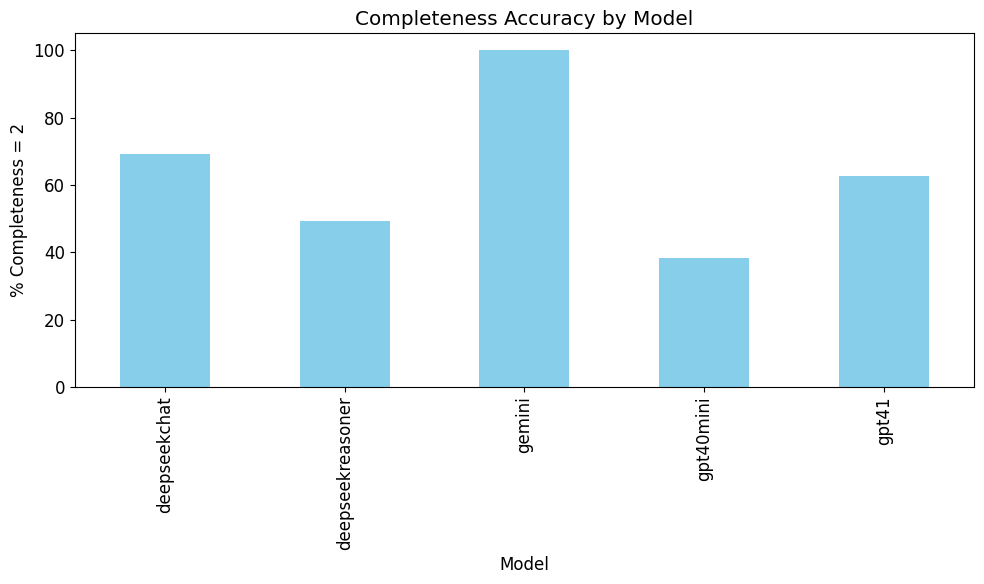

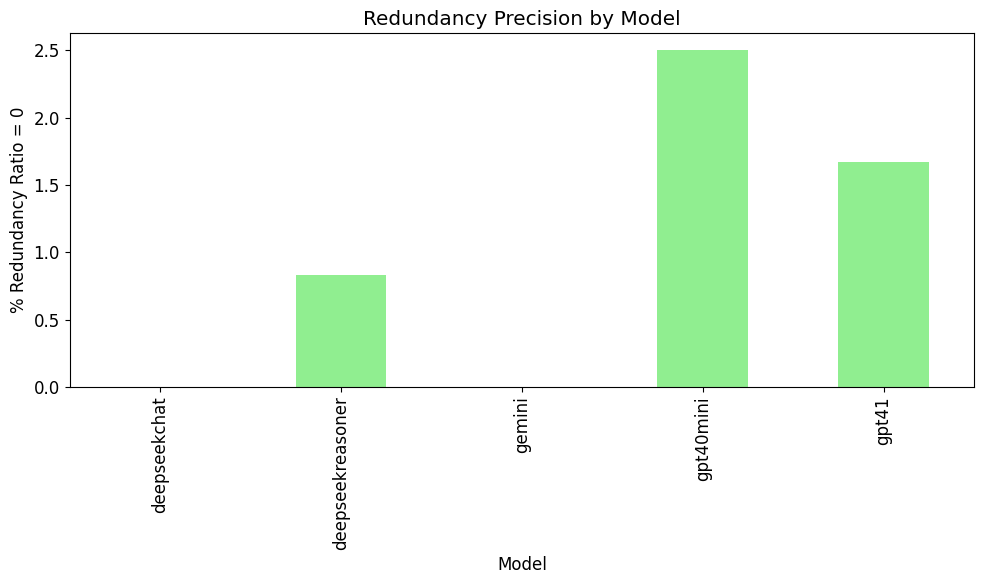

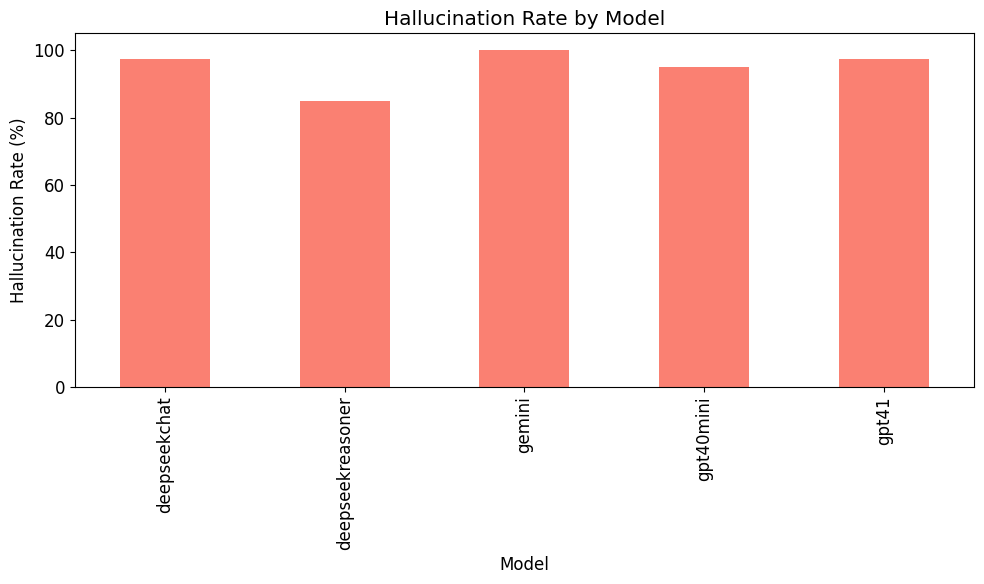

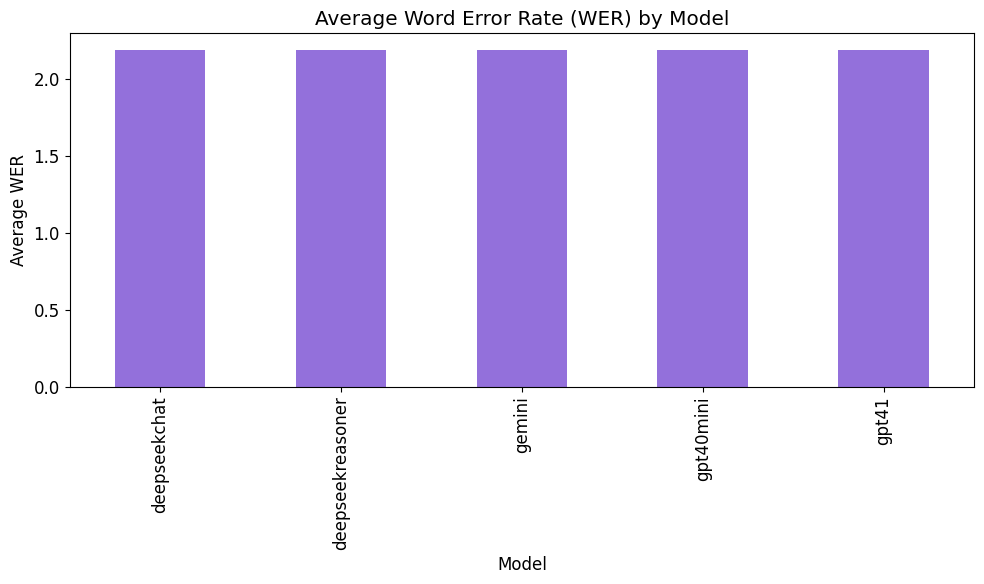

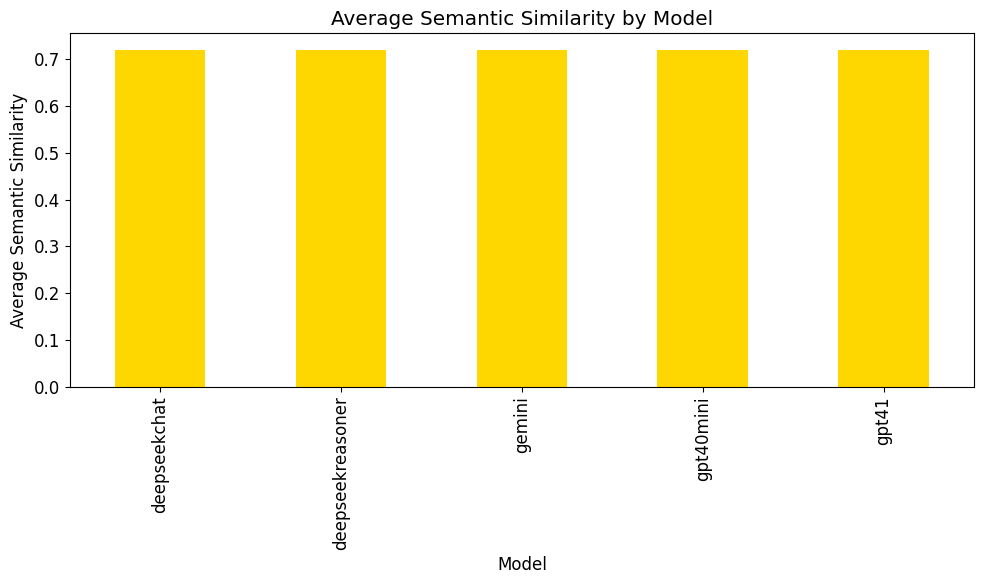

In [8]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 12})

results_df.plot(
    x='Model',
    y='Accuracy (%Completeness=2)',
    kind='bar',
    legend=False,
    color='skyblue',
    title='Completeness Accuracy by Model'
)
plt.ylabel('% Completeness = 2')
plt.tight_layout()
plt.show()

results_df.plot(
    x='Model',
    y='Redundancy Precision (%RR=0)',
    kind='bar',
    legend=False,
    color='lightgreen',
    title='Redundancy Precision by Model'
)
plt.ylabel('% Redundancy Ratio = 0')
plt.tight_layout()
plt.show()

results_df.plot(
    x='Model',
    y='Hallucination Rate (%Red Severity ≥1)',
    kind='bar',
    legend=False,
    color='salmon',
    title='Hallucination Rate by Model'
)
plt.ylabel('Hallucination Rate (%)')
plt.tight_layout()
plt.show()

results_df.plot(
    x='Model',
    y='Average WER',
    kind='bar',
    legend=False,
    color='mediumpurple',
    title='Average Word Error Rate (WER) by Model'
)
plt.ylabel('Average WER')
plt.tight_layout()
plt.show()

results_df.plot(
    x='Model',
    y='Average Semantic Similarity',
    kind='bar',
    legend=False,
    color='gold',
    title='Average Semantic Similarity by Model'
)
plt.ylabel('Average Semantic Similarity')
plt.tight_layout()
plt.show()
